## Item based Collaborative Filtering System 
Collaborative Filtering Using k-Nearest Neighbors (kNN)

In [1]:
import numpy as np
import pandas as pd

In [2]:
#read dataset
#books = pd.read_csv('C:/Users/HUAWEI/Downloads/BX-Books.csv', sep=';', on_bad_lines='skip', encoding="latin-1")
books = pd.read_csv('C:/Users/HUAWEI/Downloads/BX-Books.csv', sep=';', on_bad_lines='skip', encoding="latin-1", low_memory=False)
books.columns=['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
                   

In [3]:
books


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [4]:
books['yearOfPublication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [5]:
# Check for rows where 'yearOfPublication' is not a valid year
invalid_rows = books[~books['yearOfPublication'].str.isdigit()]
invalid_rows[['yearOfPublication', 'bookTitle', 'bookAuthor']]


,yearOfPublication,bookTitle,bookAuthor
209538,DK Publishing Inc,"DK Readers: Creating the X-Men, How It All Beg...",2000
220731,Gallimard,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003
221678,DK Publishing Inc,"DK Readers: Creating the X-Men, How Comic Book...",2000


In [6]:
# Convert to numeric, forcing errors to NaN
books['yearOfPublication'] = pd.to_numeric(books['yearOfPublication'], errors='coerce')

# Check again for invalid years
print(books['yearOfPublication'].unique())  


[2002. 2001. 1991. 1999. 2000. 1993. 1996. 1988. 2004. 1998. 1994. 2003.
 1997. 1983. 1979. 1995. 1982. 1985. 1992. 1986. 1978. 1980. 1952. 1987.
 1990. 1981. 1989. 1984.    0. 1968. 1961. 1958. 1974. 1976. 1971. 1977.
 1975. 1965. 1941. 1970. 1962. 1973. 1972. 1960. 1966. 1920. 1956. 1959.
 1953. 1951. 1942. 1963. 1964. 1969. 1954. 1950. 1967. 2005. 1957. 1940.
 1937. 1955. 1946. 1936. 1930. 2011. 1925. 1948. 1943. 1947. 1945. 1923.
 2020. 1939. 1926. 1938. 2030. 1911. 1904. 1949. 1932. 1928. 1929. 1927.
 1931. 1914. 2050. 1934. 1910. 1933. 1902. 1924. 1921. 1900. 2038. 2026.
 1944. 1917. 1901. 2010. 1908. 1906. 1935. 1806. 2021. 2012. 2006.   nan
 1909. 2008. 1378. 1919. 1922. 1897. 2024. 1376. 2037.]


In [7]:
users = pd.read_csv('C:/Users/HUAWEI/Downloads/BX-Users.csv', sep=';',on_bad_lines='skip', encoding="latin-1", low_memory=False)
users.columns = ['userID', 'Location', 'Age']

In [8]:
ratings = pd.read_csv('C:/Users/HUAWEI/Downloads/BX-Book-Ratings.csv', sep=';',on_bad_lines='skip', encoding="latin-1", low_memory=False)
ratings.columns = ['userID', 'ISBN', 'bookRating']

## Perform rating distribution 

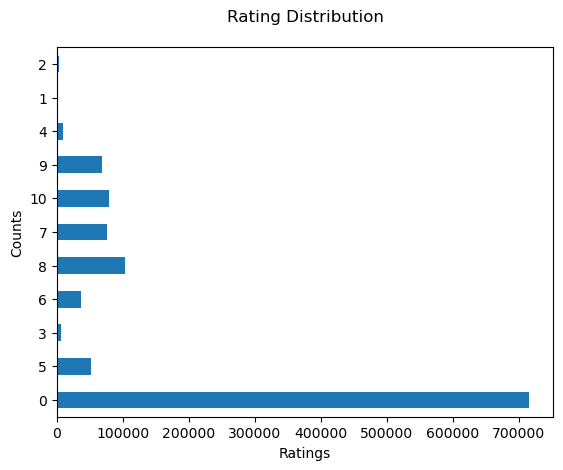

In [9]:
import matplotlib.pyplot as plt

#plt.rc("font",size=20)
ratings.bookRating.value_counts(sort=False).plot(kind='barh')
plt.title('Rating Distribution\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.show()

## Perform age distribution

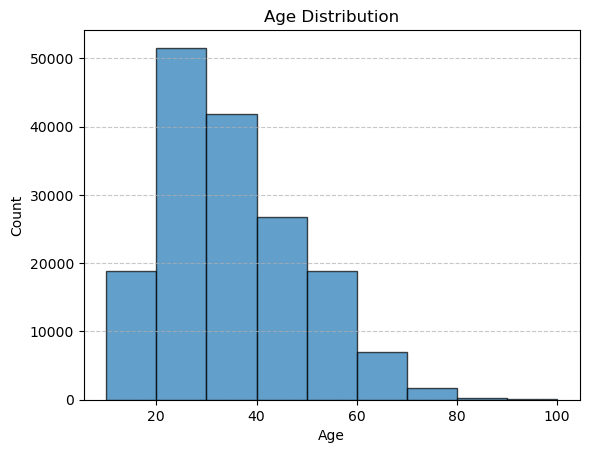

In [10]:
# Create histogram
plt.hist(users['Age'], bins=[10,20,30,40,50,60,70,80,90,100], edgecolor='black', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## to improve accuracy 
1️⃣ Users who have rated at least 200 books
2️⃣ Books that have received at least 100 ratings

In [11]:
books.shape

(271360, 8)

In [12]:
#Users who have rated at least 200 books 
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]

In [13]:
#Books that have received at least 100 ratings
counts2 = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts2[counts2 >= 100].index)]

In [14]:
ratings

,userID,ISBN,bookRating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


# Collaborative filtering with KNN

In [15]:
# merge the books and ratings
combine_booksrating = pd.merge(books,ratings, on='ISBN')

In [16]:
combine_booksrating.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL', 'userID', 'bookRating'],
      dtype='object')

In [17]:
#remove unwanted columns as focus on book recommendations
unwanted_columns = ['yearOfPublication', 'publisher', 'bookAuthor','imageUrlS', 'imageUrlM', 'imageUrlL']
combine_booksrating = combine_booksrating.drop(unwanted_columns, axis=1)
combine_booksrating.head()

,ISBN,bookTitle,userID,bookRating
0,0002005018,Clara Callan,11676,8
1,0002005018,Clara Callan,85526,0
2,0002005018,Clara Callan,96054,0
3,0002005018,Clara Callan,177458,0
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,110912,10


In [18]:
combine_booksrating

,ISBN,bookTitle,userID,bookRating
0,0002005018,Clara Callan,11676,8
1,0002005018,Clara Callan,85526,0
2,0002005018,Clara Callan,96054,0
3,0002005018,Clara Callan,177458,0
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,110912,10
...,...,...,...,...
488737,0231128444,Slow Food(The Case For Taste),275970,0
488738,0520242335,Strong Democracy : Participatory Politics for ...,275970,0
488739,0762412119,"Burpee Gardening Cyclopedia: A Concise, Up to ...",275970,0
488740,1582380805,Tropical Rainforests: 230 Species in Full Colo...,275970,0


-488742 rows × 4 columns
### Merged Dataset Contains Fewer Rows Than Individual Datasets

After merging, the dataset has 488,742 rows and 4 columns, which is fewer than the number of rows in either the ratings or books dataset.
This happens because the merge only keeps rows where the ISBN values match in both datasets (an inner join by default).
Any books that do not have ratings or ratings that do not match an ISBN in the books dataset are excluded from the merged data.
Duplicate Book Titles and ISBNs

After merging, each book's title appears multiple times because different users have rated the same book.
Since books are identified by ISBN, the dataset contains duplicate book titles, but each row represents a different user's rating.

## Handling missing values and aggregating ratings by book title

In [22]:
#remove missing book titles
combine_booksrating = combine_booksrating.dropna(axis=0, subset=['bookTitle'])

In [19]:
#count total rating of each book
#Groups by bookTitle → Each unique book title becomes a group.
#Counts occurrences of bookRating → Number of ratings per book.
#rename the count column to totalRatingCount for clarity
book_ratingCount = (combine_booksrating.
     groupby(by=['bookTitle'])['bookRating'].
     count().
     reset_index().  
     rename(columns={'bookRating':'totalRatingCount'})
                    [['bookTitle','totalRatingCount']]

)


In [20]:
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [21]:
book_ratingCount


,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160571,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160572,Ã?Â?lpiraten.,1
160573,Ã?Â?rger mit Produkt X. Roman.,1
160574,Ã?Â?stlich der Berge.,1


In [22]:
#merging
rating_with_totalRatingCount = combine_booksrating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,ISBN,bookTitle,userID,bookRating,totalRatingCount
0,0002005018,Clara Callan,11676,8,4
1,0002005018,Clara Callan,85526,0,4
2,0002005018,Clara Callan,96054,0,4
3,0002005018,Clara Callan,177458,0,4
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,110912,10,3


In [23]:
#filtering books with at least 50 ratings
popularity_threshold = 50
rating_popularbook = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popularbook.head()

,ISBN,bookTitle,userID,bookRating,totalRatingCount
7,0399135782,The Kitchen God's Wife,11676,9,111
8,0399135782,The Kitchen God's Wife,36836,0,111
9,0399135782,The Kitchen God's Wife,46398,9,111
10,0399135782,The Kitchen God's Wife,113270,0,111
11,0399135782,The Kitchen God's Wife,113519,0,111


In [24]:
rating_popularbook

,ISBN,bookTitle,userID,bookRating,totalRatingCount
7,0399135782,The Kitchen God's Wife,11676,9,111
8,0399135782,The Kitchen God's Wife,36836,0,111
9,0399135782,The Kitchen God's Wife,46398,9,111
10,0399135782,The Kitchen God's Wife,113270,0,111
11,0399135782,The Kitchen God's Wife,113519,0,111
...,...,...,...,...,...
487619,1878702831,Echoes,238781,0,54
487720,0394429869,I Know Why the Caged Bird Sings,239594,8,82
487722,0449001164,The Promise,239594,7,62
487855,0743527631,The Pillars of the Earth,240144,0,85


In [26]:
combined = rating_popularbook.merge(users, left_on='userID', right_on='userID', how='left')
us_canada_userating = combined[combined['Location'].str.contains('usa|canada')]
us_canada_userating = us_canada_userating.drop('Age', axis=1)
us_canada_userating

,ISBN,bookTitle,userID,bookRating,totalRatingCount,Location
1,0399135782,The Kitchen God's Wife,36836,0,111,"raleigh, north carolina, usa"
2,0399135782,The Kitchen God's Wife,46398,9,111,"san antonio, texas, usa"
3,0399135782,The Kitchen God's Wife,113270,0,111,"evanston, illinois, usa"
4,0399135782,The Kitchen God's Wife,113519,0,111,"pleasanton, california, usa"
5,0399135782,The Kitchen God's Wife,200674,0,111,"pittsburg, missouri, usa"
...,...,...,...,...,...,...
62142,0425106268,The Boy Next Door,238120,0,56,"louisville, kentucky, usa"
62143,0613032950,Animal Dreams,238120,0,59,"louisville, kentucky, usa"
62144,1878702831,Echoes,238781,0,54,"yucca valley, california, usa"
62147,0743527631,The Pillars of the Earth,240144,0,85,"muskego, wisconsin, usa"


## Implementing kNN
1. Remove Duplicates	Ensures unique (userID, bookTitle) pairs
2. Create Pivot Table	Converts data into a user-item matrix
3. Convert to Sparse Matrix	Optimizes storage and performance for machine learning models


In [27]:
from scipy.sparse import csr_matrix
us_canada_userating = us_canada_userating.drop_duplicates(['userID', 'bookTitle'])
us_canada_userating_pivot = us_canada_userating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_userating_matrix = csr_matrix(us_canada_userating_pivot.values)

In [28]:
#prepares the model for computing similarity using kNN 
#with the cosine similarity metric 
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(us_canada_userating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [30]:
#perform cosine similarity, kneighbors() finds the similar books based on cosine score.
#random book is picked 
query_index = np.random.choice(us_canada_userating_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(us_canada_userating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

527


In [34]:
#the random book name
print(us_canada_userating_pivot.index[query_index])

'The Carousel'

In [38]:
# Recommendations for the random book

for i in range(0, len(indices[0])):  # Skipping the first result as it's the book itself
    if i== 0:
        print('Recommendations for {0}:\n'.format(us_canada_userating_pivot.index[query_index]))
    else:
        print('{0}: {1}'.format(i, us_canada_userating_pivot.index[indices[0][i]]))
    


Recommendations for The Carousel:

1: The Woman Next Door
2: The Reader
3: Slow Waltz in Cedar Bend
4: Range of Motion
5: Seabiscuit
